In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [4]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/Newer data/prev_signficant_roles_3.csv'
df = pd.read_csv(path)

In [5]:
print(df.shape)
df.head()

(56066, 13)


,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2..."
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0,"['tt0116041', 'tt0119296', 'tt0119891', 'tt013...","[7.0, 5.3, 5.4, 5.6, 7.5, 7.6]","[5825.0, 142.0, 21117.0, 142872.0, 1476.0, 972..."
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0,"['tt0118925', 'tt0119937', 'tt0122743', 'tt021...","[6.7, 6.8, 4.8, 6.5]","[2533.0, 7359.0, 823.0, 169530.0]"
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0,[],[],[]


In [6]:
df.prev_movies_ratings = df.prev_movies_ratings.apply(literal_eval)

In [7]:
df.head()

,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2..."
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]",movie,2001.0,6.4,84717.0,"['tt0116041', 'tt0119296', 'tt0119891', 'tt013...","[7.0, 5.3, 5.4, 5.6, 7.5, 7.6]","[5825.0, 142.0, 21117.0, 142872.0, 1476.0, 972..."
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]",movie,2001.0,6.4,84717.0,"['tt0118925', 'tt0119937', 'tt0122743', 'tt021...","[6.7, 6.8, 4.8, 6.5]","[2533.0, 7359.0, 823.0, 169530.0]"
4,tt0035726,3,nm0060931,actress,\N,"[""Mary Watson""]",movie,1943.0,6.1,271.0,[],[],[]


In [8]:
principals_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/principals.csv'
principals = pd.read_csv(principals_path)
print(principals.shape)
principals.head()

(14122, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"
2,tt0035423,3,nm0000630,actor,\N,"[""Stuart Besser""]"
3,tt0035423,4,nm0005227,actor,\N,"[""Charlie McKay""]"
4,tt0118589,1,nm0001014,actress,\N,"[""Billie Frank""]"


In [9]:
principals.tconst.unique().shape

(3540,)

In [10]:
people_list = pd.DataFrame(principals.groupby('tconst')['nconst'].apply(list)).reset_index()
print(people_list.shape)
people_list.head()

(3540, 2)


,tconst,nconst
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]"


In [11]:
df['avg_starpower'] = df.apply(lambda x: np.mean(x.prev_movies_ratings), axis=1)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
df.head(2)

,tconst,ordering,nconst,category,job,characters,titleType,startYear,averageRatings,numVotes,prev_movies,prev_movies_ratings,prev_movies_numvotes,avg_starpower
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]",movie,2001.0,6.4,84717.0,"['tt0090660', 'tt0093260', 'tt0094933', 'tt009...","[5.7, 6.8, 6.1, 5.9, 5.7, 7.7, 5.9, 7.2, 5.6, ...","[11804.0, 60197.0, 10395.0, 18751.0, 1367.0, 2...",6.342857
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]",movie,2001.0,6.4,84717.0,"['tt0120903', 'tt0180037', 'tt0212936']","[7.3, 6.4, 6.3]","[612256.0, 2228.0, 610.0]",6.666667


In [13]:
df[df.avg_starpower.isna()].shape

(5889, 14)

In [14]:
# CHANGE: FILL ALL NAN avg_starpower WITH 0
df['avg_starpower'] = df['avg_starpower'].fillna(0)
df[df.avg_starpower.isna()].shape

(0, 14)

In [15]:
def get_starpower(tconst, nconst_list):
  scores = []
  for nconst in nconst_list:
    try:
      score = df[(df.tconst == tconst) & (df.nconst == nconst)].iloc[0].avg_starpower
      scores.append(score)
    except:
      # CHANGE: RETURN 0 INSTEAD OF NAN
      scores.append(0)
      print(f'Error at tconst={tconst}, nconst={nconst}')
  return scores
# get_starpower('tt1371111')

In [16]:
people_list[people_list.tconst == 'tt1371111']

,tconst,nconst
2156,tt1371111,"[nm0000158, nm0000932, nm0000424, nm0915989]"


In [17]:
get_starpower('tt1371111', ['nm0000158', 'nm0000932', 'nm0000424', 'nm0915989'])

[6.9105263157894745, 5.9772727272727275, 6.191666666666666, 6.365217391304349]

In [18]:
movie_starpowers = []
for idx, row in people_list.iterrows():
  scores = get_starpower(row.tconst, row.nconst)
  movie_starpowers.append(scores)

Error at tconst=tt0359950, nconst=nm1789985


In [19]:
len(movie_starpowers)

3540

In [20]:
people_list['starpowers'] = movie_starpowers

In [21]:
people_list.head()

,tconst,nconst,starpowers
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[6.3428571428571425, 6.666666666666667, 6.4000..."
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[0.0, 0.0, 6.0, 0.0]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[7.7, 0.0, 0.0, 5.25]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[6.05, 4.6000000000000005, 5.933333333333334, ..."
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[5.869230769230768, 6.013333333333333, 6.58, 7.0]"


In [22]:
# CHANGE: GET MEAN INSTEAD OF NPMEAN
people_list['avg_starpowers_w0'] = people_list.apply(lambda x: np.mean(x.starpowers), axis=1)
people_list['max_starpowers'] = people_list.apply(lambda x: np.max(x.starpowers), axis=1)

In [23]:
people_list.head()

,tconst,nconst,starpowers,avg_starpowers_w0,max_starpowers
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,6.666667
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[0.0, 0.0, 6.0, 0.0]",1.500000,6.000000
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[7.7, 0.0, 0.0, 5.25]",3.237500,7.700000
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[6.05, 4.6000000000000005, 5.933333333333334, ...",5.514583,6.050000
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[5.869230769230768, 6.013333333333333, 6.58, 7.0]",6.365641,7.000000


In [24]:
people_list.to_csv('starpowers_2.csv', index=False)

(array([  96.,   65.,   88.,  142.,  253.,  227.,  704.,  339., 1366.,
         260.]),
 array([0.        , 0.72611742, 1.45223485, 2.17835227, 2.9044697 ,
        3.63058712, 4.35670455, 5.08282197, 5.80893939, 6.53505682,
        7.26117424]),
 <a list of 10 Patch objects>)

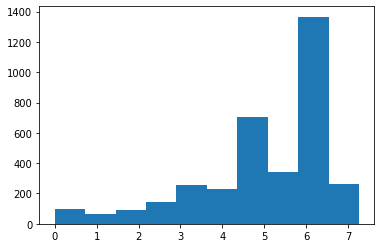

In [25]:
plt.hist(people_list.avg_starpowers_w0)

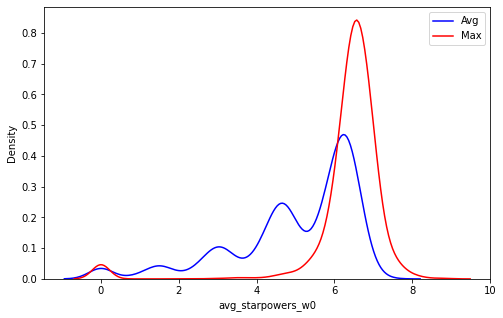

In [26]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=people_list, x='avg_starpowers_w0', color='blue', label='Avg')
sns.kdeplot(data=people_list, x='max_starpowers', color='red', label='Max')
plt.legend()
plt.show()

In [27]:
people_list.sort_values(by='avg_starpowers_w0', ascending=False)[:15]

,tconst,nconst,starpowers,avg_starpowers_w0,max_starpowers
607,tt0325980,"[nm0000136, nm0001691, nm0089217, nm0461136]","[6.986363636363635, 6.558333333333334, 8.8, 6.7]",7.261174,8.800000
631,tt0330373,"[nm0705356, nm0914612, nm0342488, nm0843059]","[7.633333333333333, 7.65, 7.633333333333333, 5...",7.225595,7.650000
821,tt0373889,"[nm0705356, nm0914612, nm0342488, nm0322407]","[7.6499999999999995, 7.666666666666667, 7.4399...",7.216439,7.666667
1959,tt1201607,"[nm0705356, nm0914612, nm0342488, nm0002091]","[7.4875, 7.4142857142857155, 7.260000000000001...",7.195208,7.487500
1041,tt0417741,"[nm0705356, nm0914612, nm0342488, nm0002091]","[7.433333333333333, 7.32, 7.449999999999999, 6...",7.193333,7.450000
2517,tt1731141,"[nm0000148, nm2633535, nm2794962, nm1113550]","[6.811764705882353, 7.6, 7.6, 6.757142857142857]",7.192227,7.600000
1639,tt0926084,"[nm0705356, nm0914612, nm0342488, nm0631490]","[7.457142857142856, 7.366666666666667, 7.275, ...",7.131521,7.457143
1425,tt0498380,"[nm0913822, nm0632497, nm0407296, nm1076976]","[7.516666666666667, 7.2, 6.7, 6.8]",7.054167,7.516667
1187,tt0449088,"[nm0000136, nm0089217, nm0461136, nm0001691]","[6.974193548387096, 7.49, 7.028571428571428, 6.7]",7.048191,7.490000
66,tt0167260,"[nm0000704, nm0001557, nm0005212, nm0089217]","[6.446666666666667, 5.8999999999999995, 7.0, 8.8]",7.036667,8.800000
